In [175]:
#importing necessary packages
import os
import tweepy,json
import pandas as pd
os.chdir(r"C:\Users\Collin\Documents\collins documents\Regis Homework\Machine Learning wk 6")

In [176]:
#Following URL https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/twitter-data-in-python/
#For collecting Twitter data
consumer_key= 'ZlD4tlgcd7JibmHUsN8cldJp0'
consumer_secret= 'U9LEJPlUGFSyCxhpWqKhUJeZqJnEMLrzJUn0LaugMcLc26YtcC'
access_token= '1320949664154177536-0qokgMIjGhQIyeOEQYXKtzlpOEL3W2'
access_token_secret= 'fL9SAvAVOGqpFTl93Dl94I6nTFu7mKONsVo2KSJzW0e0u'

In [177]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [178]:
#Selecting Hashtag for search
search_words = "#wildfires"
date_since = "2021-08-30"
new_search = search_words + " -filter:retweets"
numtweet = 1000

In [179]:
#Scraping the twitter data through a created function that takes the search word, the date and the number of tweets to scrape
def scrape(search_words, date_since, numtweet):
      
    # Creating DataFrame using pandas
    db = pd.DataFrame(columns=['username', 'description', 'location', 'following',
                               'followers', 'totaltweets', 'retweetcount', 'text', 'hashtags'])
      
    # We are using .Cursor() to search through twitter for the required tweets.
    # The number of tweets can be restricted using .items(number of tweets)
    tweets = tweepy.Cursor(api.search, q=words, lang="en",
                           since=date_since, tweet_mode='extended').items(numtweet)
     
    # .Cursor() returns an iterable object. Each item in 
    # the iterator has various attributes that you can access to 
    # get information about each tweet
    list_tweets = [tweet for tweet in tweets]
      
    # Counter to maintain Tweet Count
    i = 1  
      
    # we will iterate over each tweet in the list for extracting information about each tweet
    for tweet in list_tweets:
        username = tweet.user.screen_name
        description = tweet.user.description
        location = tweet.user.location
        following = tweet.user.friends_count
        followers = tweet.user.followers_count
        totaltweets = tweet.user.statuses_count
        retweetcount = tweet.retweet_count
        hashtags = tweet.entities['hashtags']
          
        # Retweets can be distinguished by a retweeted_status attribute,
        # in case it is an invalid reference, except block will be executed
        try:
            text = tweet.retweeted_status.full_text
        except AttributeError:
            text = tweet.full_text
        hashtext = list()
        for j in range(0, len(hashtags)):
            hashtext.append(hashtags[j]['text'])
          
        # Here we are appending all the extracted information in the DataFrame
        ith_tweet = [username, description, location, following,
                     followers, totaltweets, retweetcount, text, hashtext]
        db.loc[len(db)] = ith_tweet
          
        # Function call to print tweet data on screen
        printtweetdata(i, ith_tweet)
        i = i+1
    filename = 'scraped_tweets.csv'
      
    # we will save our database as a CSV file.
    db.to_csv(filename)

In [247]:
#Reading in the data file saved from the scraping to analyze tweets
df = pd.read_csv('scraped_tweets.csv')
x = df.text.str.replace("https", "", regex=True)
x.head()
df = df.drop(['text'], axis=1)
frames = [df, x]
df = df.join(x)

In [248]:
df.head()

,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,hashtags,text
0,0,KenFry10,"Ancient traveller. Multi-Award-Winning, #Amazo...","Surrey, UK",38284,42706,197343,16,['Wildfires'],Thrilled to have flash in @jmwwjournal! #Wildf...
1,1,BeytienJoshua,"Business Man, Railfan, Artiste","Dubuque, Iowa",10,159,48681,0,"['musicvideo', 'animation', 'animated', 'Anima...",this little music video does prove a point abo...
2,2,BCWildfireHelp,West Coast #Wildfire #FireTwitter since 2017 |...,"West Coast, North America",4679,5668,64931,2,[],13-year-old Ryan Honary was traveling in Arizo...
3,3,mishahueco,Experienced Biophysical ecologist| looking fo...,"Cochin, India",338,49,166,0,"['phytoplankton', 'Aerosols', 'wildfires', 'Oc...",😄😄 #phytoplankton find the way\n\n#aerosols fr...
4,4,FereJohn,FDR Dem (minus racism). Believe in Public Good...,SoCal,4999,4041,185326,0,['wildfires'],wild horses: reducing frequency and intensity ...


In [249]:
#Saving the tweets as a variable
X = df['text']

In [250]:
#importing packages for running KMeans
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances

import nltk
import string

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')


# email module has some useful functions
import os, sys, email,re

In [251]:
#Following site https://medium.com/swlh/tweets-classification-and-clustering-in-python-b107be1ba7c7
# Taking the tweets and creating feature vectors to be readable for clustering
from sklearn.feature_extraction.text import TfidfVectorizer
data = df['text']


tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english',#tokenizer = tokenize_and_stem,
                             max_features = 20000)
tf_idf = tf_idf_vectorizor.fit_transform(data)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

In [252]:
pd.DataFrame(tf_idf_array, columns=tf_idf_vectorizor.get_feature_names()).head()

,00,000,09,0bkakqm9m9,0g740vm4ar,0ggidqvgli,0ic9baqjp4,0j5t3f24pn,0nnkkkjm4r,0pnic933gs,...,zv20pwhvlw,zw7vtp7kb0,zx1qzogde6,zx9xmhlatw,zxmqw3ihax,zys0l4wxbl,κάρπαθος,لبنان,𝒟𝒾𝑒𝒷𝒪1,𝒟𝒾𝑒𝒷𝒪37
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.217982,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [253]:
#More from https://medium.com/swlh/tweets-classification-and-clustering-in-python-b107be1ba7c7
# Creating functions to pick a random starting point for the centroids of the clusters 
class Kmeans:
    """ K Means Clustering
    
    Parameters
    -----------
        k: int , number of clusters
        
        seed: int, will be randomly set if None
        
        max_iter: int, number of iterations to run algorithm, default: 200
        
    Attributes
    -----------
       centroids: array, k, number_features
       
       cluster_labels: label for each data point
       
    """
    
    def __init__(self, k, seed = None, max_iter = 200):
        self.k = k
        self.seed = seed
        if self.seed is not None:
            np.random.seed(self.seed)
        self.max_iter = max_iter
        
            
    
    def initialise_centroids(self, data):
        """Randomly Initialise Centroids
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        centroids: array of k centroids chosen as random data points 
        """
        
        initial_centroids = np.random.permutation(data.shape[0])[:self.k]
        self.centroids = data[initial_centroids]

        return self.centroids

In [254]:
#Updates clusters to have observations pick the smallest average Euclidean distance from the centroid of a cluster
def assign_clusters(self, data):
        """Compute distance of data from clusters and assign data point
           to closest cluster.
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        cluster_labels: index which minmises the distance of data to each
        cluster
            
        """
        
        if data.ndim == 1:
            data = data.reshape(-1, 1)
        
        dist_to_centroid =  pairwise_distances(data, self.centroids, metric = 'euclidean')
        self.cluster_labels = np.argmin(dist_to_centroid, axis = 1)
        
        return  self.cluster_labels
    
    
def update_centroids(self, data):
        """Computes average of all data points in cluster and
           assigns new centroids as average of data points
        
        Parameters
        -----------
        data: array or matrix, number_rows, number_features
        
        Returns
        -----------
        centroids: array, k, number_features
        """
        
        self.centroids = np.array([data[self.cluster_labels == i].mean(axis = 0) for i in range(self.k)])
        
        return self.centroids

In [255]:
def predict(self, data):
        """Predict which cluster data point belongs to
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        cluster_labels: index which minmises the distance of data to each
        cluster
        """
        
        return self.assign_clusters(data)
    
def fit_kmeans(self, data):
        """
        This function contains the main loop to fit the algorithm
        Implements initialise centroids and update_centroids
        according to max_iter
        -----------------------
        
        Returns
        -------
        instance of kmeans class
            
        """
        self.centroids = self.initialise_centroids(data)
        
        # Main kmeans loop
        for iter in range(self.max_iter):

            self.cluster_labels = self.assign_clusters(data)
            self.centroids = self.update_centroids(data)          
            if iter % 100 == 0:
                print("Running Model Iteration %d " %iter)
        print("Model finished running")
        return self    

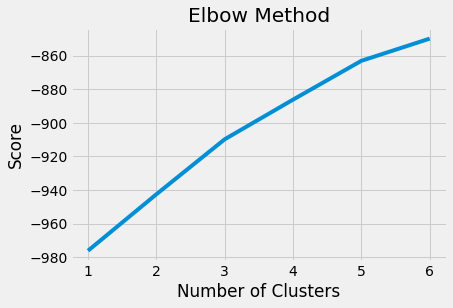

In [256]:
# Running and plotting Kmeans using the Elbow method
number_clusters = range(1, 7)

kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters]
kmeans

score = [kmeans[i].fit(tf_idf_array).score(tf_idf_array) for i in range(len(kmeans))]
score

plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()

In [257]:
#Based on the graph from the Elbow method the optimal number of clusters is three this is where the "elbow" forms or the chanrge in slope

AttributeError: 'KMeans' object has no attribute 'centroids'

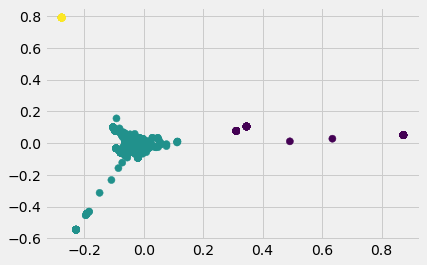

In [258]:
#Using PCA to show the different clusters and which observation fits which cluster
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
test_e = KMeans(n_clusters=3, init='k-means++',max_iter= 600)
fitted = test_e.fit(Y_sklearn)
predicted_values = test_e.predict(Y_sklearn)

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=predicted_values, s=50, cmap='viridis')

centers = fitted.centroids
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);

In [259]:
#Predict the closest cluster for each observation
from sklearn.cluster import KMeans
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
kmeans = KMeans(n_clusters=3, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

In [260]:
#Get the top features
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = tf_idf_vectorizor.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs
dfs = get_top_features_cluster(tf_idf_array, prediction, 15)
dfs

[         features     score
 0       wildfires  0.053604
 1      california  0.032770
 2           fires  0.020514
 3   climatechange  0.018871
 4         support  0.018390
 5        wildfire  0.017776
 6             amp  0.017136
 7        heatwave  0.016835
 8         climate  0.016693
 9           years  0.015506
 10           2020  0.015041
 11        burning  0.014056
 12           sept  0.013760
 13           help  0.012887
 14         greece  0.012635,          features     score
 0             amp  0.287896
 1       extensive  0.214746
 2   corresponding  0.214746
 3       according  0.210288
 4             2nd  0.210288
 5             row  0.210288
 6           began  0.208483
 7    measurements  0.208483
 8      54mw1iwmd7  0.208483
 9            cams  0.204012
 10        highest  0.204012
 11          burnt  0.191616
 12         carbon  0.190141
 13          areas  0.190141
 14     atmosphere  0.189419,       features     score
 0         look  0.358489
 1        smoke  0.3

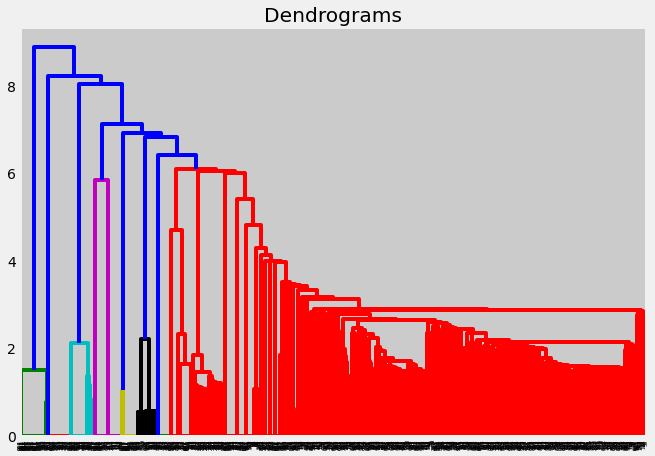

In [261]:
#Dendrogram code used from Lecture 6 on worldclass
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(tf_idf_array, method='ward'))

In [262]:
#Importing for wordcloud
#https://www.datacamp.com/community/tutorials/wordcloud-python
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [263]:
text = df.text[0]

In [264]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud().generate(text)

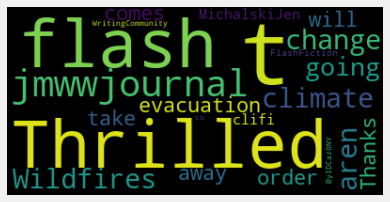

In [265]:
#Wordcloud for one tweet
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [266]:
text = " ".join(tweet for tweet in df.text)
print ("There are {} words in the combination of all tweets.".format(len(text)))

There are 230359 words in the combination of all tweets.


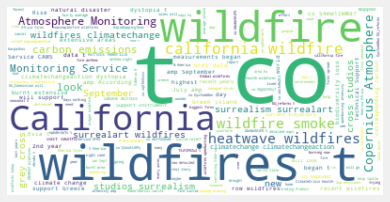

In [267]:
#Wordcloud for all tweets
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [268]:
stopwords.update(["CO", "t"])

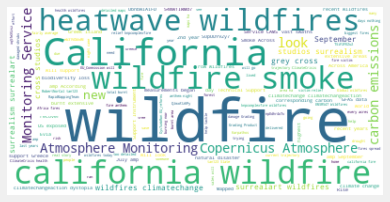

In [269]:
#Wordcloud with adjusted stopwords
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

After looking at at the different tweets they can be most effectively grouped into three clusters within the #wildfire tag.
Some of the key words that determine the cluster are california, climatechange, heatwave, and 2020.  The Elbow method and Dendrogram show that a split at three clusters the groups are cleary defined.  